# IMDb Movie Review Sentiment Analysis

### Problem Statement

The primary objective of this project is to build a machine learning classification model that
can predict the sentiment of IMDb movie reviews. The dataset contains a collection of movie
reviews, and each review is labeled as either positive or negative.

### Dataset Information

The IMDb dataset contains a large number of movie reviews, each labeled with either a
positive or negative sentiment.<br>
● **Text of the review**  : The actual review provided by the user.<br>
● **Sentiment label**     : The sentiment of the review, either "positive" or "negative."

In [6]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Loading the Dataset and having a view at first few rows 
df = pd.read_csv("Imdb - data_imdb.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
# Having a view at total rows and columsn available in dataset
df.shape

(50000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


From above info we can see that there are 2 columns consisting of 50,000 rows and looks like there no significant  null values in the dataset.<br>Let's confrom with isnull.sum function

In [11]:
# Checking for null values in the dataset
df.isnull().sum()

review       0
sentiment    0
dtype: int64

Here we can conform that there are no significant null values in the dataset.

In [13]:
# Checking for columns available in dataset
df.columns

Index(['review', 'sentiment'], dtype='object')

In [14]:
# Checking for values distribution of Sentiment
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

We can see that the distribution of both Positive and negative are equally distributed in the dataset we can say that this is a balanced dataset.

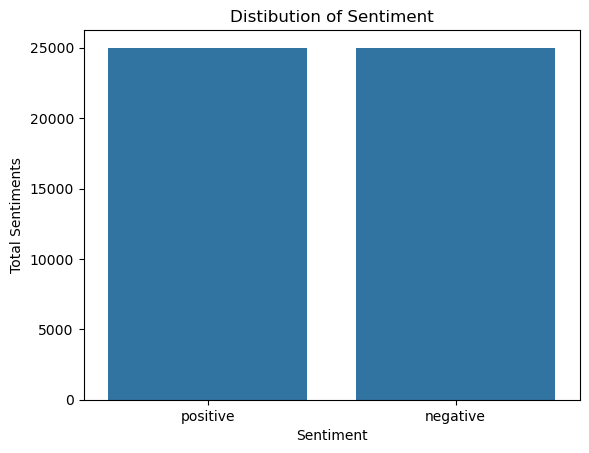

In [16]:
# Distibution of Sentiment
sns.countplot(x=df['sentiment'])
plt.title("Distibution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Total Sentiments")
plt.show()

###  Performing data Cleaning and Text Preprocessing

In [18]:
# Importing necessary libraries for text preprocessing.
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
## Text Preprocessing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def preprocessing(text):
    text = text.lower() #converting to lower case
    text = re.sub(r'[^a-z\s]',"",text) #Removig the special characters
    tokens = word_tokenize(text) # tokenzing the words
    tokens = [word for word in tokens if word not in stop_words] #removing the stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens) 
    return text

In [20]:
df['preprocessed_review']=df['review'].apply(preprocessing)
df.head()

,review,sentiment,preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [21]:
# Importing necessary libraries for text Vectorisation(Transformation to text values to numerical values). 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Assigning the Features and Target variables for Training the model
x = df["preprocessed_review"]
y = df["sentiment"]

In [23]:
# Converting the textual data to numerical data for Training of the model using (Tfidf Vectorizer).
vectorizer = TfidfVectorizer(max_features=5000)
x_tfidf = vectorizer.fit_transform(x)

In [24]:
# Converting the textual data to numerical data for Training of the model using Count Vectorizer(Bag of Words).
c_vectorizer = CountVectorizer(max_features=5000)
x_bow = c_vectorizer.fit_transform(x)

#### Textual features

In [26]:
# Creating a funtion to calculate the word count,character_count,average word lengths,sentence count per row
def extract_text_features(text):
    words = word_tokenize(text)  # Tokenize words
    sentences = sent_tokenize(text)  # Tokenize sentences
    
    word_count = len(words)  # Total words
    char_count = len(text)  # Total characters
    avg_word_length = char_count / word_count if word_count > 0 else 0  # Avg word length
    sentence_count = len(sentences)  # Total sentences
    
    return pd.Series([word_count, char_count, avg_word_length, sentence_count])

# Applying feature extraction to all rows and adding columns to dataset.
df[["word_count", "char_count", "avg_word_length", "sentence_count"]] = df["review"].apply(extract_text_features)


In [27]:
# Having look at dataset after adding columns.
df.head()

,review,sentiment,preprocessed_review,word_count,char_count,avg_word_length,sentence_count
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...,380.0,1761.0,4.634211,10.0
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...,201.0,998.0,4.965174,7.0
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,205.0,926.0,4.517073,4.0
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...,175.0,748.0,4.274286,6.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,283.0,1317.0,4.653710,9.0


In [28]:
# Looking for statiscal summary of our dataset
df.describe()

,word_count,char_count,avg_word_length,sentence_count
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,279.470740,1309.367720,4.677384,10.740600
std,207.956581,989.759532,0.349289,7.900382
min,3.000000,7.000000,2.221477,1.000000
25%,151.000000,699.000000,4.460526,6.000000
50%,209.000000,970.000000,4.675892,9.000000
75%,340.000000,1590.000000,4.894737,13.000000
max,2911.000000,13704.000000,7.849462,282.000000


From above data we can see that average(mean) words is 279 and maximum words are at 2911 where as minimum words are at 3.similarly<br>
From above data we can see that average(mean) charater count is 1309 and maximum characters are at 13,704 where as minimum words are at 7.similarly<br>
From above data we can see that average(mean) average word length is 4.67 and maximum word length are at 8 where as minimum word length are at 2.2.similarly<br>
From above data we can see that average(mean) sentences is 10.75 and maximum sentences are at 282 where as minimum sentences are at 1.

## Model Development and Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
# Splittig the text into training and testing sets
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(x_tfidf,y,test_size = 0.2,random_state = 42)

In [33]:
# Splittig the text into training and testing sets
x_train_bow,x_test_bow,y_train_bow,y_test_bow = train_test_split(x_bow,y,test_size = 0.2,random_state = 42)

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
# Training the model with TF-IDF to test the model

log_reg = LogisticRegression() #creating the logistic regression model
# training the model 
log_reg.fit(x_train_tfidf,y_train_tfidf) 
# predicting values the model
log_reg_pred_tfidf = log_reg.predict(x_test_tfidf)
print("The Accuracy of Logistic Regression Model is:",accuracy_score(log_reg_pred_tfidf,y_test_tfidf)*100)

The Accuracy of Logistic Regression Model is: 88.46000000000001


In [37]:
# Training the model with Bag of word to test the model
log_reg.fit(x_train_bow,y_train_bow) # training the model
# predicting values the model
log_reg_pred_bow = log_reg.predict(x_test_bow)
print("The Accuracy of Logistic Regression Model is:",accuracy_score(log_reg_pred_bow,y_test_bow)*100)

The Accuracy of Logistic Regression Model is: 87.22999999999999


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
# Training the model with TF-IDF to test the model
mb = MultinomialNB()
# training the model 
mb.fit(x_train_tfidf,y_train_tfidf)
# predicting values the model
mb_pred_tfidf = mb.predict(x_test_tfidf)
print("The Accuracy of Naive Bayes Model is:",accuracy_score(mb_pred_tfidf,y_test_tfidf)*100)

The Accuracy of Naive Bayes Model is: 85.18


In [41]:
# Training the model with Bag of word to test the model
# training the model 
mb.fit(x_train_bow,y_train_bow)
# predicting values the model
mb_pred_bow = mb.predict(x_test_bow)
print("The Accuracy of Naive Bayes Model is:",accuracy_score(mb_pred_bow,y_test_bow)*100)

The Accuracy of Naive Bayes Model is: 84.55


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Training the model with TF-IDF to test the model
rf = RandomForestClassifier()
# training the model 
rf.fit(x_train_tfidf,y_train_tfidf)
# predicting values the model
rf_pred_tfidf = rf.predict(x_test_tfidf)
print("The Accuracy of Random Forest Model is:",accuracy_score(rf_pred_tfidf,y_test_tfidf)*100)

The Accuracy of Random Forest Model is: 84.8


In [45]:
# Training the model with Bag of word to test the model
# training the model 
rf.fit(x_train_bow,y_train_bow)
# predicting values the model
rf_pred_bow = rf.predict(x_test_bow)
print("The Accuracy of Random Forest Model is:",accuracy_score(rf_pred_bow,y_test_bow)*100)

The Accuracy of Random Forest Model is: 84.69


### Support Vector Machine

In [47]:
from sklearn.svm import LinearSVC 

In [48]:
# Training the model with TF-IDF to test the model
svc = LinearSVC()
# training the model 
svc.fit(x_train_tfidf,y_train_tfidf)
# predicting values the model 
svc_pred_tfidf = svc.predict(x_test_tfidf)
print("The Accuracy of SVC Model is:",accuracy_score(svc_pred_tfidf,y_test_tfidf)*100)

The Accuracy of SVC Model is: 87.78


In [49]:
# Training the model with Bag of word to test the model
# training the model 
svc.fit(x_train_bow,y_train_bow)
# predicting values the model
svc_pred_bow = svc.predict(x_test_bow)
print("The Accuracy of SVC Model is:",accuracy_score(svc_pred_bow,y_test_bow)*100)

The Accuracy of SVC Model is: 86.47


**Conclusion :** From the Models which have used to train our data we have seen that among the three model the Logistic Regression with Tf-idf vectorization has given the best accuracy of 89% .So we proceding with this model for prediciton of our Sentiment of Reviews of IMDb.

In [51]:
# Classification Report
print("The Classification Report of Logistic Regression Model:\n",classification_report(log_reg_pred_tfidf,y_test_tfidf))

The Classification Report of Logistic Regression Model:
               precision    recall  f1-score   support

    negative       0.87      0.89      0.88      4835
    positive       0.90      0.88      0.89      5165

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Our Logistic Regression Model's Overall Accuracy = 88%<br>

The model correctly classifies 88% of reviews (both positive & negative).<br>
This is good performance for a basic logistic regression model.<br>
    
F1-Score (Balanced Performance Measure)<br>
F1-score for both classes ~88-89% → Indicates a well-balanced model.<br>
No major bias towards positive or negative reviews.<br>

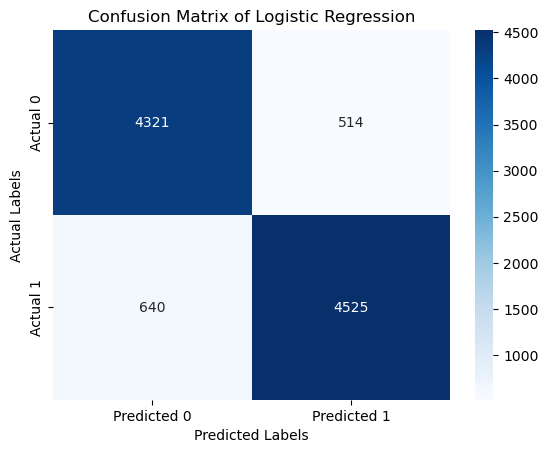

In [53]:
# Creating and visualising the COnfusion Matrix
conf_matrix = confusion_matrix(log_reg_pred_tfidf,y_test_tfidf)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


Our Test dataset is around 10,000 samples among all those samples Our Logistic Regression Model has predicted correctly for around 8846 values in which True positives contributes around 4525 and True Negative consists around 4321 and model wrongly predicted for 1154 samples in which False Negatives is around 640 and False Positive are around 514 values respectivelly.Overally we can say that our model performance is satisfactory with an accurary of around 88.5%.

## Predict sentiment for New Review

In [56]:
def predict_sentiment():
    user_input = str(input("Enter The Review:"))
    preprocess_text = preprocessing(user_input)
    tfidf_review = vectorizer.transform([preprocess_text])
    pred_sentiment = log_reg.predict(tfidf_review)
    print(f"The Review Entered :{user_input}" )
    print(f"The Predicted sentiment for the New review is :{pred_sentiment}")

In [57]:
predict_sentiment()

Enter The Review: An absolutely amazing movie with a fantastic storyline and great performances!


The Review Entered :An absolutely amazing movie with a fantastic storyline and great performances!
The Predicted sentiment for the New review is :['positive']


In [58]:
predict_sentiment()

Enter The Review: The worst movie I have ever seen. Complete waste of time!", "label


The Review Entered :The worst movie I have ever seen. Complete waste of time!", "label
The Predicted sentiment for the New review is :['negative']


In [59]:
predict_sentiment()

Enter The Review: Boring and predictable. I almost fell asleep watching it


The Review Entered :Boring and predictable. I almost fell asleep watching it
The Predicted sentiment for the New review is :['negative']
